# PIK 87/2

* [Verteilung der Funde](#Verteilung-der-Funde)
* [Keramische Stilgruppen](#Keramische-Stilgruppen)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# pd.options.display.mpl_style = 'default'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [2]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/2'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Anzahl,Gr_Clist,Art,Tiefe
0,PIK,87/2,-1,None,893.0,1.0,,Knochen,55
1,PIK,87/2,-1,None,288.0,1.0,,Sonst,55
2,PIK,87/2,-1:10,MBJ/PDM (?),4.0,1.0,30,K,55
3,PIK,87/2,-1:110,MBJ/PDM (?),5.0,1.0,30,K,55
4,PIK,87/2,-1:114,MBJ/PDM (?),5.0,1.0,30,K,55


In [3]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
# df_pivot.rename(columns={'HL': 'Hüttenlehm', 'K': 'Keramik'}, inplace=True)
# python2: df_pivot.rename(columns={'HL': 'Hüttenlehm'.decode('utf-8'), 'K': 'Keramik'}, inplace=True)
# df_pivot['HL'] = df_pivot['HL'].replace(['HL'], ['Keramik'])
df_pivot

Art,Botanik,Eisen,Glas,HL,K,Knochen,Laterit,Ofenwand,Schlacke,Sonder,Sonst,Stein
Tiefe,,,,,,,,,,,,
55,3.0,17.0,14.0,11.0,7959.0,909.0,31.0,13.0,264.0,24.0,288.0,58.0
75,0.0,6.0,0.0,0.0,5691.0,618.0,14.0,2.0,135.0,0.0,356.0,0.0
95,0.0,0.0,0.0,0.0,2872.0,1004.0,20.0,12.0,160.0,0.0,353.0,19.0
115,0.0,0.0,0.0,0.0,4762.0,1236.0,10.0,0.0,26.0,167.0,1043.0,0.0
135,0.0,0.0,0.0,0.0,3653.0,1416.0,0.0,0.0,0.0,26.0,309.0,0.0
165,0.0,0.0,0.0,15.0,2274.0,498.0,0.0,0.0,0.0,0.0,170.0,0.0


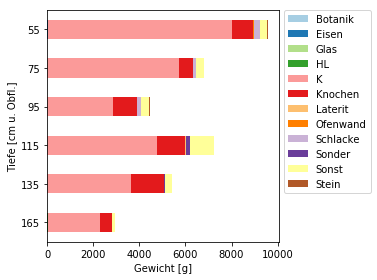

In [4]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-9_PIK87-2_VerteilungFunde.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **PIK 87/2** Fundverteilung

In [5]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-09_PIK87-2_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Botanik,2,0.2,0.00,0.0
1,Eisen,3,0.2,0.02,0.1
2,Glas,6,0.5,0.01,0.0
3,gebrannter Lehm,2,0.2,0.03,0.1
4,Keramik,1077,89.5,27.21,74.6
5,Knochen,20,1.7,5.68,15.6
6,Laterit,11,0.9,0.08,0.2
7,Ofenwand,4,0.3,0.03,0.1
8,Schlacke,66,5.5,0.58,1.6
9,Sonder,4,0.3,0.22,0.6


## Keramische Stilgruppen

In [6]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/2')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
df['Typ'] = df['Typ'].replace('','(?)')
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Gewicht,Gr_Clist,Art,Tiefe
0,PIK,87/2,-1:10,MBJ/PDM (?),4.0,30,K,55
1,PIK,87/2,-1:110,MBJ/PDM (?),5.0,30,K,55
2,PIK,87/2,-1:114,MBJ/PDM (?),5.0,30,K,55
3,PIK,87/2,-1:135,MBJ/PDM (?),7.0,30,K,55
4,PIK,87/2,-1:140,MBJ/PDM (?),6.0,30,K,55


In [7]:
np.sum(df['Gewicht'])

27211.0

In [8]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot

Typ,EBA,EBA (?),EPE (?),KON (?),MBJ (?),MBJ/PDM (?),MDB,MDB (?),MDB/PDM (?),OUE (?),OUE/MDB (?),PDM,PDM (?),PDM/MDB (?),PKM,PKM (?)
Tiefe,,,,,,,,,,,,,,,,
55,275.0,0.0,0.0,7.0,4.0,131.0,435.0,0.0,0.0,25.0,0.0,41.0,530.0,0.0,120.0,50.0
75,169.0,15.0,0.0,0.0,21.0,0.0,195.0,2.0,9.0,30.0,0.0,0.0,314.0,0.0,65.0,10.0
95,29.0,0.0,0.0,0.0,0.0,0.0,209.0,9.0,20.0,3.0,0.0,0.0,123.0,0.0,25.0,45.0
115,93.0,7.0,0.0,0.0,0.0,0.0,277.0,74.0,254.0,0.0,0.0,0.0,33.0,0.0,258.0,24.0
135,0.0,138.0,9.0,0.0,0.0,0.0,255.0,21.0,0.0,8.0,23.0,11.0,207.0,0.0,20.0,52.0
165,17.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,144.0,55.0,84.0,0.0


> ToDo: evtl. Chronologieschema zur Abfolge der Stilgruppen in die DB ablegen

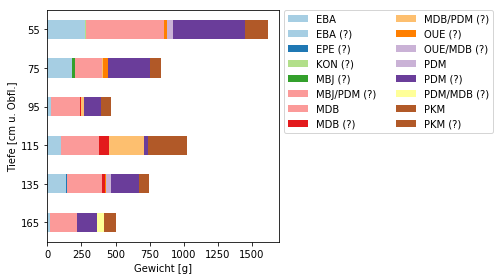

In [9]:
ax = df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), ncol = 2, loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-9_PIK87-2_KeramikStilgruppen.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

> **PIK 87/2** keramische Stilgruppen

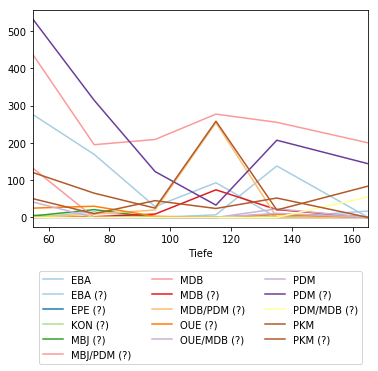

In [10]:
df_pivot.plot(kind = 'line', cmap = 'Paired')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=3, borderaxespad = 0.)

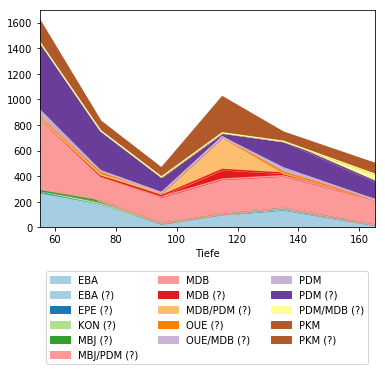

In [11]:
df_pivot.plot(kind = 'area', cmap = 'Paired')
lgd = plt.legend(bbox_to_anchor=(0.5, -0.2), loc = 9, ncol=3, borderaxespad = 0.)

%-Anteil MDB-Keramik im Befund:

In [17]:
df_pivot['MDB'].sum() / np.sum(df['Gewicht']) * 100

5.773400463048032

## Fragmentierung

In [11]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Gr_Clist, 
           t_Obj.Art 
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/2')
           AND ((t_Obj.Art) = "K")
           AND ((t_obj.Gr_Clist) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
display(df.head())

,ort_kurz,Komplex,Individuum,Gr_Clist,Art
0,PIK,87/2,-1:10,30,K
1,PIK,87/2,-1:110,30,K
2,PIK,87/2,-1:114,30,K
3,PIK,87/2,-1:135,30,K
4,PIK,87/2,-1:140,30,K


In [12]:
df_pivot = df.pivot_table(values = 'ort_kurz', index = 'Gr_Clist', aggfunc = len)
# da es in PIK 87/2 keine Keramik größer als 120 gab, müssen Dummy-Werte manuell eingefügt werden:
df_pivot['200'] = 0.
df_pivot['>200'] = 0.
df_pivot

Gr_Clist
30       97
70      121
120       3
200       0
>200      0
Name: ort_kurz, dtype: float64

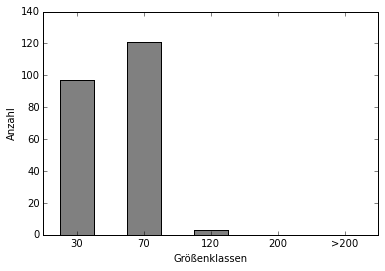

In [13]:
df_pivot.plot(kind = 'bar', color = 'gray')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.savefig('../output/figs/9-9_PIK87-2_Fragmentierung.pdf')
plt.show()

> **PIK 87/2** Fragmentierung

## 1987 ausgesonderte Keramik

In [15]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe,
           t_Obj.Notiz
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/2')
           AND ((t_Obj.Art) = "K")
           AND ((t_Obj.Notiz) Like '%1987%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Art,Tiefe,Notiz
0,PIK,87/2,-4,None,None,2630,None,K,115,1987 im Gelände ausgesondert
1,PIK,87/2,-4,None,None,780,None,K,115,1987 im Gelände ausgesondert
2,PIK,87/2,-3,None,None,1680,None,K,95,1987 im Gelände ausgesondert
3,PIK,87/2,-3,None,None,510,None,K,95,1987 im Gelände ausgesondert
4,PIK,87/2,-2,None,,3120,None,K,75,1987 im Gelände ausgesondert


In [16]:
a = np.sum(df['Gewicht'])
a

19040

In [17]:
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', aggfunc = sum)
# df_pivot = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Typ', aggfunc = sum)
df_pivot = df_pivot.fillna(0)
df_pivot

Tiefe
55     5200
75     4230
95     2190
115    3410
135    2520
165    1490
Name: Gewicht, dtype: int64

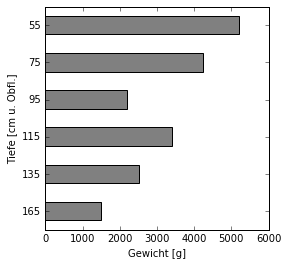

In [18]:
ax = df_pivot.plot(kind = 'barh', color = 'gray')
# df_pivot.plot(kind = 'barh', stacked=True, cmap = 'Paired')
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.savefig('../output/figs/9-9_PIK87-2-1987ausgesondert_A.pdf', bbox_inches='tight')
plt.show()

In [20]:
# Gewicht aller Keramik
sql = """SELECT
           t_Obj.Gewicht
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'PIK')
           AND ((t_Obj.Komplex) = '87/1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)



c = pd.Series({'aufgehoben':np.sum(df['Gewicht']),
               'ausgesondert':a})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
aufgehoben,23279,55.008389
ausgesondert,19040,44.991611
